In [75]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns



In [76]:
df = pd.read_excel('../data/subtme/1-s2.0-S0092867421011053-mmc2.xlsx', header=2)
df

,Group,symbol,RNA.logFC,RNA.P.Value,RNA.adj.P.Val,Protein.logFC,Protein.P.Value,Protein.adj.P.Val
0,RNA.DOWN;Protein.DOWN,IGFBP5,-1.509766,0.000116,0.006821,-4.723270,4.723560e-14,2.696208e-10
1,RNA.DOWN;Protein.DOWN,SFRP4,-1.677453,0.000022,0.002633,-3.453961,6.285004e-07,2.562486e-05
2,Protein.DOWN,ABI3BP,-1.199889,0.004017,0.058505,-3.087829,1.826594e-08,1.861822e-06
3,RNA.DOWN;Protein.DOWN,TNXB,-1.501768,0.002039,0.038753,-3.087685,1.144352e-08,1.306392e-06
4,Protein.DOWN,TBCA,0.118731,0.504807,0.756534,-3.005399,1.885959e-04,2.074192e-03
...,...,...,...,...,...,...,...,...
1439,Protein.UP,P3H4,0.347256,0.023620,0.167602,3.526651,1.777411e-13,5.072730e-10
1440,Protein.UP,SH3BGRL3,0.170969,0.323176,0.627046,3.603441,6.920884e-06,1.567635e-04
1441,Protein.UP,SFN,1.269927,0.032710,0.200675,3.800845,2.203259e-06,6.319701e-05
1442,Protein.UP,SUMO1,0.320934,0.074334,0.306051,4.164550,1.151448e-12,1.095411e-09


In [77]:
# reactive up, deserted down
reactive = df[[True if 'RNA.UP' in g else False for g in df['Group']]]
reactive = reactive.sort_values('RNA.adj.P.Val')
reactive

,Group,symbol,RNA.logFC,RNA.P.Value,RNA.adj.P.Val,Protein.logFC,Protein.P.Value,Protein.adj.P.Val
263,RNA.UP,IGF2,3.667854,2.374062e-07,0.000273,-0.135463,8.009799e-01,0.933088
1363,RNA.UP;Protein.UP,ENAH,0.886146,3.238120e-07,0.000323,2.243233,2.016583e-08,0.000002
665,RNA.UP,FAT3,2.481289,3.429714e-07,0.000324,0.779984,4.616026e-02,0.160955
262,RNA.UP,ANGPTL2,1.255106,6.360924e-07,0.000415,-0.138470,7.672177e-01,0.918770
86,RNA.UP;Protein.DOWN,COL5A3,1.485546,9.754015e-07,0.000441,-1.284561,1.753309e-03,0.011809
...,...,...,...,...,...,...,...,...
361,RNA.UP,SGCD,0.773073,2.768650e-03,0.047363,0.323138,2.650069e-01,0.550458
310,RNA.UP,BASP1,0.488914,2.781960e-03,0.047455,0.111114,5.427910e-01,0.800040
268,RNA.UP,CA9,3.197679,2.848958e-03,0.048049,-0.106564,8.457871e-01,0.948528
520,RNA.UP,DRAP1,0.295507,2.900912e-03,0.048697,0.540696,2.633640e-01,0.547843


In [78]:
# reactive up, deserted down
deserted = df[[True if 'RNA.DOWN' in g else False for g in df['Group']]]
deserted = deserted.sort_values('RNA.adj.P.Val')
deserted

,Group,symbol,RNA.logFC,RNA.P.Value,RNA.adj.P.Val,Protein.logFC,Protein.P.Value,Protein.adj.P.Val
261,RNA.DOWN,STRA6,-1.962559,2.956555e-08,0.000242,-0.141071,7.286999e-01,0.906669
223,RNA.DOWN,SLC29A1,-1.226757,8.532078e-08,0.000242,-0.341813,4.521852e-01,0.734029
562,RNA.DOWN,SPTBN1,-1.002733,2.086064e-08,0.000242,0.609895,3.600017e-02,0.131052
230,RNA.DOWN,AAMP,-0.445679,8.323160e-07,0.000415,-0.269484,4.918469e-01,0.763520
50,RNA.DOWN;Protein.DOWN,SUSD2,-1.681092,7.250716e-07,0.000415,-1.678381,2.012391e-06,0.000060
...,...,...,...,...,...,...,...,...
294,RNA.DOWN,LAMC3,-1.774762,2.972656e-03,0.049395,0.026161,9.470329e-01,0.984959
339,RNA.DOWN,SIL1,-0.315202,2.979602e-03,0.049395,0.204174,6.652246e-01,0.875110
286,RNA.DOWN,NUP210,-0.667091,3.006716e-03,0.049683,-0.000309,9.990291e-01,0.999611
72,RNA.DOWN;Protein.DOWN,MGP,-1.122023,3.023583e-03,0.049872,-1.395059,8.055933e-07,0.000030


In [79]:
tumor_genes = ['MUC1', 'CYP35A', 'CDH1', 'SPINT2', 'USH1C', 'DDR1', 'ST14', 'SLC44A2', 'ERBB3', 'LIPH']
reactive_genes = reactive['symbol'].to_list()
deserted_genes = deserted['symbol'].to_list()

In [80]:
reactive_genes

['IGF2',
 'ENAH',
 'FAT3',
 'ANGPTL2',
 'COL5A3',
 'MAP4K4',
 'DCHS1',
 'MME',
 'GALNT5',
 'ITGA5',
 'MYO1B',
 'FNBP1L',
 'MMP2',
 'ANKRD28',
 'EML1',
 'PXDN',
 'GOLM1',
 'SDC1',
 'MMP14',
 'RARRES2',
 'NXN',
 'PGM2L1',
 'TGFBI',
 'TNC',
 'UBE2H',
 'PDE4D',
 'MMP9',
 'COL12A1',
 'COLEC12',
 'TPM4',
 'GREM1',
 'HTRA1',
 'COL5A2',
 'GJA1',
 'ZNF281',
 'P3H1',
 'NT5E',
 'FSCN1',
 'TES',
 'PLOD2',
 'LGALS1',
 'MFAP2',
 'CTHRC1',
 'KDM1A',
 'DPYSL3',
 'STEAP1',
 'LPP',
 'COL6A3',
 'COL6A1',
 'BPGM',
 'C1QTNF3',
 'RAI14',
 'ALDH1B1',
 'COL6A2',
 'CD109',
 'PDLIM3',
 'EPHB4',
 'KIAA1217',
 'TPBG',
 'LOXL2',
 'CA12',
 'TP53I3',
 'SHB',
 'PRKAB2',
 'MCU',
 'CALU',
 'CDH2',
 'COL8A1',
 'OLFML3',
 'YWHAQ',
 'CPXM1',
 'PCDH7',
 'FNDC3B',
 'CAPZB',
 'GBE1',
 'COL11A1',
 'BAIAP2L1',
 'PLS3',
 'LRRC15',
 'GLT8D2',
 'MICU1',
 'CEMIP2',
 'FLNC',
 'TGFB1I1',
 'FILIP1L',
 'CNN1',
 'FAM114A1',
 'COL3A1',
 'VCAM1',
 'IKBIP',
 'PYGL',
 'ANTXR1',
 'PALMD',
 'HMGB3',
 'PTK7',
 'CD99',
 'C6orf132',
 'DES',
 'E

In [81]:
deserted_genes

['STRA6',
 'SLC29A1',
 'SPTBN1',
 'AAMP',
 'SUSD2',
 'PLEKHA6',
 'MATN2',
 'PHLDB1',
 'MAP2',
 'MAPRE3',
 'TGM2',
 'FGL2',
 'ENG',
 'DHRS7B',
 'PAG1',
 'ITPR1',
 'JAG1',
 'FBLN5',
 'GSN',
 'TMEM119',
 'LTBP4',
 'ITIH3',
 'SYNPO',
 'SFRP4',
 'PLEKHA7',
 'CADPS',
 'THSD4',
 'NDRG2',
 'FRY',
 'CARMIL1',
 'CLMN',
 'SORL1',
 'ANO1',
 'GGT5',
 'NFIA',
 'ABLIM1',
 'CGNL1',
 'ANK3',
 'ITGBL1',
 'NISCH',
 'PYGM',
 'ITIH5',
 'IGFBP2',
 'ARAP1',
 'MAOB',
 'KIF16B',
 'MPRIP',
 'CFC1',
 'IGFBP5',
 'RTN1',
 'PDIA2',
 'GATA6',
 'MCF2L2',
 'PLBD1',
 'TIMP1',
 'SULT1A1',
 'ME1',
 'SORBS2',
 'SERPINB9',
 'SERPINF2',
 'APOD',
 'NGFR',
 'PKP2',
 'EGFR',
 'TMEM120A',
 'CAPN6',
 'TBXAS1',
 'TACC1',
 'PDGFRB',
 'LTBP2',
 'ECHDC2',
 'CDH6',
 'DPEP1',
 'ANKRD44',
 'MTTP',
 'GSTA1',
 'DOCK6',
 'RRAS',
 'SLC4A4',
 'INPP5D',
 'GDAP1',
 'CLIC2',
 'DHRS3',
 'TRIOBP',
 'AFMID',
 'GPD1L',
 'P3H2',
 'EFHD1',
 'SOD3',
 'PACS1',
 'PC',
 'THBS4',
 'SAMHD1',
 'TTN',
 'UBA7',
 'ARHGAP26',
 'PRELP',
 'MAX',
 'METTL7A',
 'SO

In [40]:
fmap = pd.read_csv('/home/estorrs/spatial-analysis/data/sample_map.txt', sep='\t', index_col=0)
adata_map = {}
for s, fp, d, t in zip(fmap.index, fmap['spaceranger_output'], fmap['disease'], fmap['tissue_type']):
    if 'pdac' == d and t == 'ffpe':
        adata_map[s] = fp
adata_map

{'HT264P1_S1H2Fs1_U1': '/data/spatial_transcriptomics/spaceranger_outputs/pancreatic/HT264P1-S1H2Fs1U1Bp1',
 'HT270P1_S1H1Fs5U1': '/data/spatial_transcriptomics/spaceranger_outputs/pancreatic/HT270P1-S1H1Fs5U1Bp1'}

In [53]:
adata = sc.read_visium(adata_map['HT270P1_S1H1Fs5U1'])
adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 3940 × 17943
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [54]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
adata.var['mt'] = [gene.startswith('MT-') for gene in adata.var_names]
adata.obs['mt_frac'] = adata[:, adata.var['mt']].X.sum(1).A.squeeze()/adata.obs['total_counts']

/home/estorrs/miniconda3/envs/violet/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estorrs/miniconda3/envs/violet/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estorrs/miniconda3/envs/violet/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

<AxesSubplot:xlabel='n_genes_by_counts'>

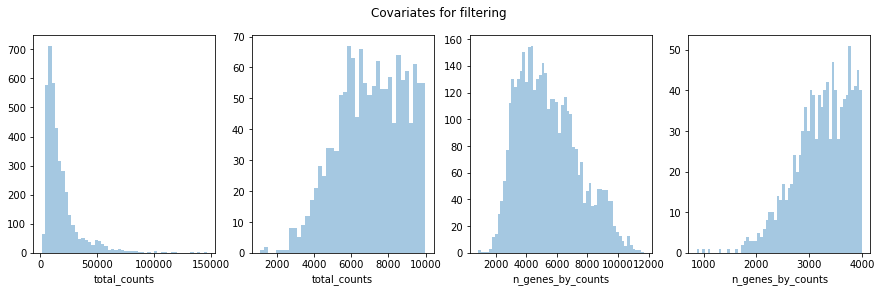

In [55]:
fig, axs = plt.subplots(1,4, figsize=(15,4))
fig.suptitle('Covariates for filtering')
sns.distplot(adata.obs['total_counts'], kde=False, ax = axs[0])
sns.distplot(adata.obs['total_counts'][adata.obs['total_counts']<10000], kde=False, bins=40, ax = axs[1])
sns.distplot(adata.obs['n_genes_by_counts'], kde=False, bins=60, ax = axs[2])
sns.distplot(adata.obs['n_genes_by_counts'][adata.obs['n_genes_by_counts']<4000], kde=False, bins=60, ax = axs[3])

In [56]:
sc.pp.filter_cells(adata, min_counts = 5000)
print(f'Number of cells after min count filter: {adata.n_obs}')
# sc.pp.filter_cells(adata, max_counts = 35000)
# print(f'Number of cells after max count filter: {adata.n_obs}')
adata = adata[adata.obs['mt_frac'] < 0.2]
print(f'Number of cells after MT filter: {adata.n_obs}')
sc.pp.filter_cells(adata, min_genes = 2800)
print(f'Number of cells after gene filter: {adata.n_obs}')
sc.pp.filter_genes(adata, min_cells=10)
print(f'Number of genes after cell filter: {adata.n_vars}')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after min count filter: 3752
Number of cells after MT filter: 3752


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after gene filter: 3719


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of genes after cell filter: 15637


In [57]:
def preprocess_adata(adata):
    sc.pp.normalize_total(adata, inplace = True)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=2000, inplace=True)
    
    sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')
    sc.pp.neighbors(adata)

    sc.tl.umap(adata)
    sc.tl.leiden(adata, key_added='clusters')
    
    return adata

In [58]:
adata = preprocess_adata(adata)

In [59]:
def score_spots(adata):
    f = adata[:, [True if g in tumor_genes else False
                  for g in adata.var.index.to_list()]]
    adata.obs['tumor_score'] = np.mean(f.X, axis=1)
    
    f = adata[:, [True if g in reactive_genes else False
                  for g in adata.var.index.to_list()]]
    adata.obs['reactive_score'] = np.mean(f.X, axis=1)
    
    f = adata[:, [True if g in deserted_genes else False
                  for g in adata.var.index.to_list()]]
    adata.obs['deserted_score'] = np.mean(f.X, axis=1)
    
    return adata

In [60]:
adata = score_spots(adata)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


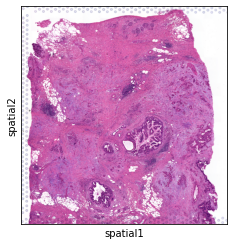

In [61]:
sc.pl.spatial(adata)

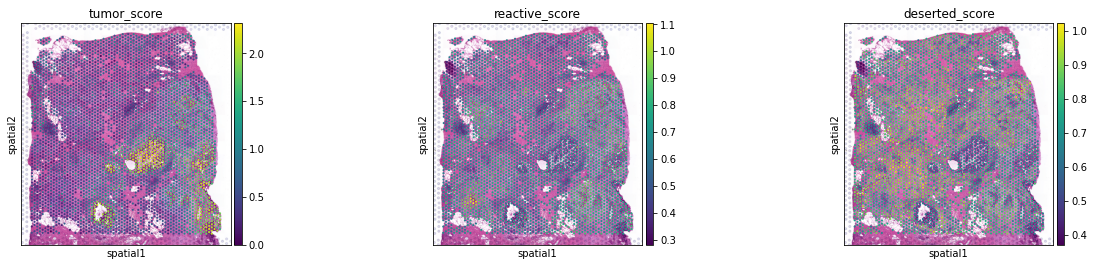

In [62]:
sc.pl.spatial(adata, color=['tumor_score', 'reactive_score', 'deserted_score'])

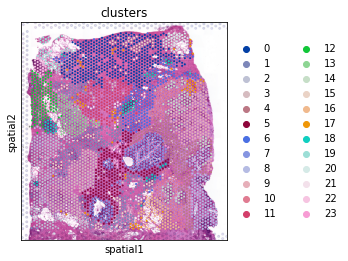

In [65]:
sc.pl.spatial(adata, color='clusters')

In [70]:
adata.obs

,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,mt_frac,n_counts,n_genes,clusters,tumor_score,reactive_score,deserted_score
AAACAACGAATAGTTC-1,1,0,16,4833,8.483430,11842.0,9.379492,20.815741,26.752238,33.718966,45.853741,0.0,11842.0,4833,21,0.662400,0.699823,0.814094
AAACAAGTATCTCCCA-1,1,50,102,3770,8.235095,7570.0,8.932080,20.990753,26.486129,33.566711,46.657860,0.0,7570.0,3770,6,0.622135,0.558373,0.727206
AAACAATCTACTAGCA-1,1,3,43,3964,8.285261,8363.0,9.031693,19.000359,25.325840,32.978596,45.940452,0.0,8363.0,3964,2,0.428747,0.765690,0.735895
AAACACCAATAACTGC-1,1,59,19,6222,8.736007,17416.0,9.765202,16.059945,21.290767,28.094855,40.365181,0.0,17416.0,6222,4,1.468984,0.714088,0.841791
AAACAGAGCGACTCCT-1,1,14,94,3485,8.156510,6972.0,8.849801,21.572002,28.284567,35.556512,48.393574,0.0,6972.0,3485,1,0.296682,0.598232,0.742433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,1,31,77,4259,8.357024,9169.0,9.123693,19.315083,25.411713,32.631694,45.086705,0.0,9169.0,4259,17,0.508071,0.742859,0.887891
TTGTTTCACATCCAGG-1,1,58,42,5801,8.665958,14963.0,9.613402,14.535855,19.721981,26.438548,39.009557,0.0,14963.0,5801,4,1.651486,0.858983,0.747632
TTGTTTCATTAGTCTA-1,1,60,30,6196,8.731821,15942.0,9.676775,12.520386,17.325304,23.986953,36.287793,0.0,15942.0,6196,8,1.526434,0.773705,0.774481
TTGTTTCCATACAACT-1,1,45,27,2976,7.998671,5473.0,8.607765,22.090261,27.882331,34.989951,48.602229,0.0,5473.0,2976,1,0.277281,0.543357,0.694806


In [71]:
def assign_clusters(adata):
    options = ['tumor', 'reactive', 'deserted']
    keys = ['tumor_score', 'reactive_score', 'deserted_score']
    
    idxs = np.argmax(adata.obs[keys].values, axis=1)
#     print(idxs.shape)
    adata.obs['assignment'] = [options[i] for i in idxs]
    
    return adata

In [72]:
adata = assign_clusters(adata)

... storing 'assignment' as categorical


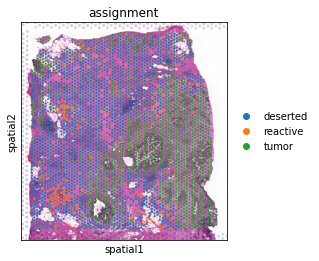

In [73]:
sc.pl.spatial(adata, color='assignment')

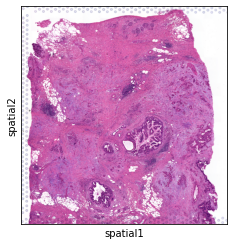

In [74]:
sc.pl.spatial(adata)